<a href="https://colab.research.google.com/github/mali-erel/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/RL_Test_V0_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow
!pip install -q gym
!pip install -q keras
!pip install -q keras-rl2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.9 MB/s eta 0:00:00


In [4]:
!pip install -q keras
!pip install -q keras-rl2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.5 MB/s eta 0:00:00


### Imports

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import gym
from gym import Env
from gym.spaces import Discrete, Box
import random
import math
import tensorflow as tf
import keras
import pandas as pd

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import TensorBoard

from keras import __version__
tf.keras.__version__ = __version__

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from math import pow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## GYM Environment Experimental

### Relay 2

In [74]:
x_rl2 = np.arange(1.5, 25, 0.5)

In [91]:
y_rl2[len(y_rl2)-1]
y_rl2

array([8.59710942, 5.01451351, 3.78485524, 3.15096546, 2.75897075,
       2.48987805, 2.29218338, 2.13986004, 2.01828814, 1.91859623,
       1.83507409, 1.76387122, 1.70229137, 1.64838681, 1.60071312,
       1.55817498, 1.51992561, 1.48529931, 1.45376493, 1.42489311,
       1.39833271, 1.37379351, 1.35103338, 1.32984859, 1.31006633,
       1.29153901, 1.27413973, 1.25775873, 1.24230052, 1.22768161,
       1.21382867, 1.20067696, 1.18816911, 1.17625409, 1.16488632,
       1.15402495, 1.14363328, 1.13367818, 1.12412973, 1.11496076,
       1.10614658, 1.09766468, 1.08949452, 1.08161724, 1.07401559,
       1.06667368, 1.05957687, 1.05957687, 0.99444614, 0.9498472 ,
       0.91422794, 0.88488466, 0.86013412, 0.83886627, 0.8203153 ,
       0.80393336, 0.80393336, 0.9498472 , 0.91422794, 0.88488466,
       0.86013412, 0.83886627, 0.8203153 , 0.80393336])

In [106]:
x_rl2 = np.arange(1.5, 25, 0.5)
x_rl2

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5,
       18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5])

In [107]:
#x_rl2 = np.linspace(1.23,30,30)
TMS=0.5
y_vals = []
for x in x_rl2:
    y_vals.append(TMS*((0.14)/(pow(x,0.02)-1)))
y_rl2 = np.array(y_vals)
y_rl2 = np.append(y_rl2,(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
x_rl2 = np.append(x_rl2,(x_rl2[len(x_rl2)-1],30,35,40,45,50,55,60,65))

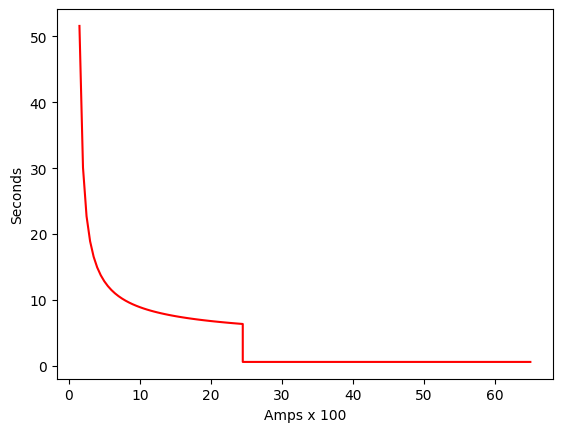

In [111]:
plt.xlabel("Amps x 100")
plt.ylabel("Seconds")
plt.plot(x_rl2, y_rl2*6, color = 'red')

### Relay 1

In [127]:
x_rl1 = np.arange(1.5, 35, 0.5)
x_rl1

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5,
       18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5,
       29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
       34.5])

In [128]:
#x_rl1 = np.linspace(1.1,30,30)
TMS_rl1 = 0.67
y_rl1 =[]
for x in x_rl1:
    y_rl1.append((TMS_rl1 * ((0.14)/(pow(x,0.02)-1))))
y_rl1 = np.array(y_rl1)
y_rl1 = np.append(y_rl1,(0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5))
x_rl1 = np.append(x_rl1,(x_rl1[len(x_rl1)-1],40,45,50,55,60,65,70,75))

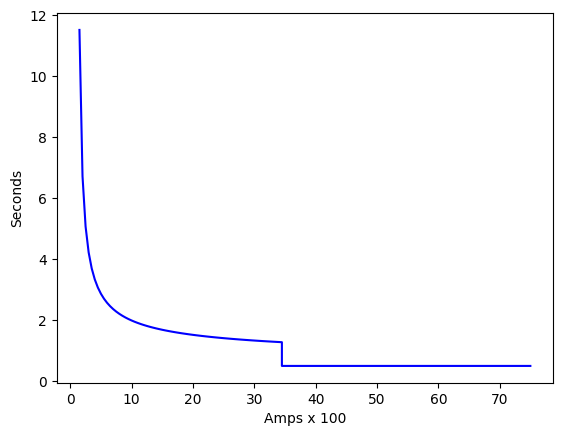

In [129]:
plt.xlabel("Amps x 100")
plt.ylabel("Seconds")
plt.plot(x_rl1, y_rl1, color = 'blue')

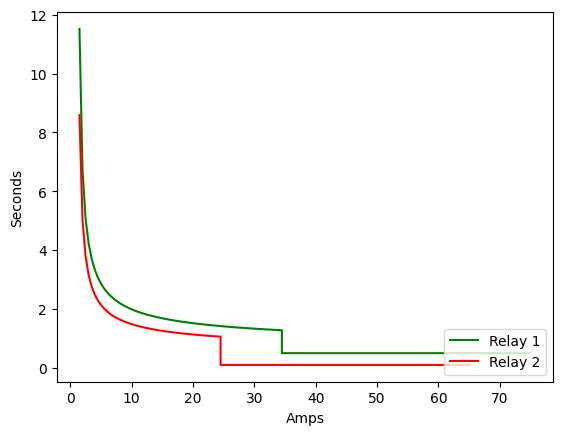

In [130]:
plt.plot(x_rl1,y_rl1,'g')
plt.plot(x_rl2,y_rl2,'r')
plt.xlabel('Amps')
plt.ylabel('Seconds')
plt.legend(["Relay 1", "Relay 2"], loc ="lower right")

In [90]:
np.arange(2.34, 31.97, 2)

array([ 2.34,  4.34,  6.34,  8.34, 10.34, 12.34, 14.34, 16.34, 18.34,
       20.34, 22.34, 24.34, 26.34, 28.34, 30.34])

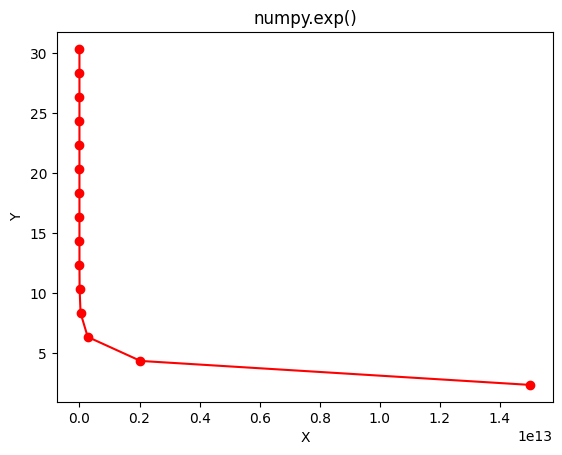

In [91]:
# Python program showing
# Graphical representation of
# exp() function
import numpy as np
import matplotlib.pyplot as plt

in_array = np.arange(2.34, 31.97, 2)
out_array = np.exp(in_array)

y = np.flip(in_array)

plt.plot(out_array, y, color = 'red', marker = "o")
plt.title("numpy.exp()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Starting Graphs of Each Relays

Text(0.5, 1.0, 'Relay 1')

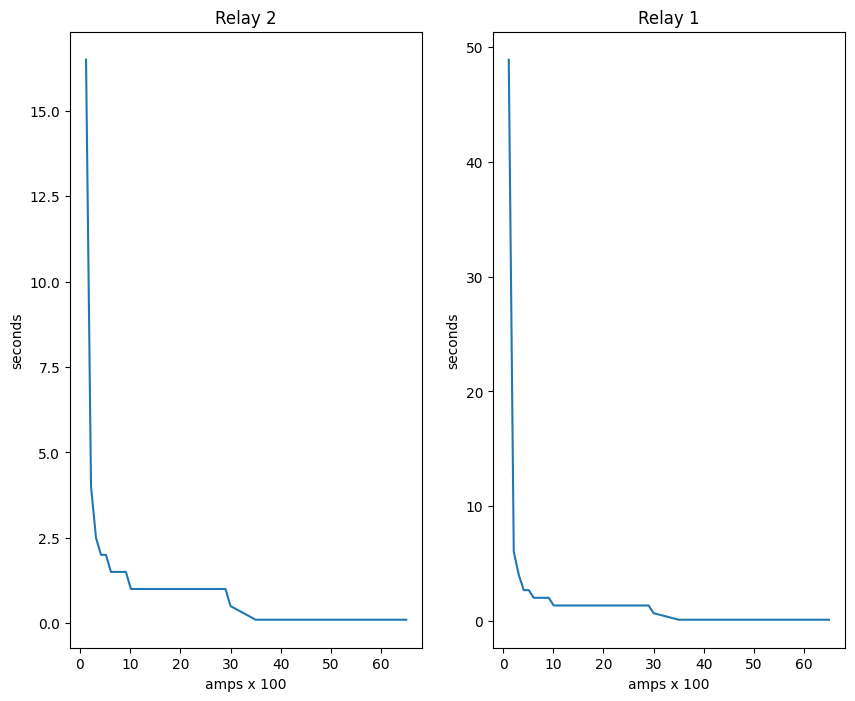

In [38]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(x_rl2,y_rl2)
plt.xlabel('amps x 100')
plt.ylabel('seconds')
plt.title('Relay 2')

plt.subplot(1,2,2)
plt.plot(x_rl1,y_rl1)
plt.xlabel('amps x 100')
plt.ylabel('seconds')
plt.title('Relay 1')

### GYM Environemnt

In [ ]:
x = random.uniform(0,1)
x
random.uniform(0.005,1)

0.6301460658096854

In [ ]:
def customCalc(TMS_Value,x_rl1,empty_y_rl1):
  for x in x_rl1:
    value = TMS_Value*((0.14)/(x**0.02-1))
    empty_y_rl1.append(value)
  empty_y_rl1 = np.array(empty_y_rl1)
  return empty_y_rl1

class testEnv(Env):

  def __init__(self):
      # Axtions we can take: up, down, wait
      self.action_space = Discrete(5)
      # Action array
      # self.action_space = Box(low=-1.0,high=1.0,dtype=np.float32)
      self.observation_space = Box(low=0.0,high = 50.0)
      #Set start amp array
      self.state = np.linspace(1.1,30,30) + random.uniform(-1,1)
      # Set time (60 sec)
      self.time_length = 60
      self.TMS = 0.6
      self.dt = 0
  def step(self,action):

      random_add = 0
      y_Env = []

      if(action==0):
        self.time_length -= 1
        self.state += random.uniform(0.05,1)
        #  print('Action 0 -- Value:{} -- Time:{}'.format(random_add,self.time_length))
      if(action==1):
        self.time_length -= 1
        self.state += random.uniform(-1,-0.05)
        #  print('Action 1 -- Value:{} -- Time:{}'.format(random_add,self.time_length))
      if(action==2):
        self.state = self.state
      if action==3:
        self.TMS += 0.05
      if action==4:
        self.TMS -= 0.05

      y_Env = customCalc(self.TMS,self.state,y_Env)
      self.dt = np.mean(np.subtract(y_rl2,y_Env))

      if self.dt<0.55 and self.dt>0.39:
        reward = 1
      #elif dt<0.65 and dt>0.25:
      #  reward = 1
      elif self.dt<0 or self.dt == 0:
        reward = -5
      else:
        reward = -1

      if self.TMS<1 and self.TMS>0.4:
        reward = 1
      elif self.TMS>1:
        reward = -1
      else:
        reward = -1

      if self.time_length <=0:
          done=True
      else:
          done=False

      info = {'dt':self.dt,'TMS':self.TMS,'x_rl2':self.state.all()}#,'y_rl1':y_Env,'x_rl2':self.state}
      return self.state, reward, done, info



  def reset(self):
      self.state = np.linspace(1.1,30,30)+ random.uniform(-1,1) #+ random.randint(-2,2)
      self.time_length = 60
      self.TMS = 0.6
      self.dt = 0
      return self.state

  def render(self):
    #plt.plot(self.x_rl1_dep,self.y_rl1_dep,'g')
    #plt.plot(x_rl2,y_rl2,'r')
    #plt.xlabel('Amps')
    #plt.ylabel('Seconds')
    #plt.legend(["Relay 1", "Relay 2"], loc ="lower right")
    pass

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = testEnv()
env.reset

<bound method testEnv.reset of <__main__.testEnv object at 0x7f53f5176470>>

In [ ]:
env.action_space.sample()

1

In [ ]:
env.state

array([ 0.7121194 ,  1.70867112,  2.70522284,  3.70177457,  4.69832629,
        5.69487802,  6.69142974,  7.68798146,  8.68453319,  9.68108491,
       10.67763664, 11.67418836, 12.67074009, 13.66729181, 14.66384353,
       15.66039526, 16.65694698, 17.65349871, 18.65005043, 19.64660215,
       20.64315388, 21.6397056 , 22.63625733, 23.63280905, 24.62936077,
       25.6259125 , 26.62246422, 27.61901595, 28.61556767, 29.6121194 ])

In [ ]:
env.observation_space

Box(0.0, 100.0, (1,), float32)

In [ ]:
env.action_space.n

5

In [ ]:
x_rl1

array([ 1.1       ,  2.09655172,  3.09310345,  4.08965517,  5.0862069 ,
        6.08275862,  7.07931034,  8.07586207,  9.07241379, 10.06896552,
       11.06551724, 12.06206897, 13.05862069, 14.05517241, 15.05172414,
       16.04827586, 17.04482759, 18.04137931, 19.03793103, 20.03448276,
       21.03103448, 22.02758621, 23.02413793, 24.02068966, 25.01724138,
       26.0137931 , 27.01034483, 28.00689655, 29.00344828, 30.        ])

### Test

In [ ]:
episodes = 50
stop = False
for episode in range(1,episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:

    action = env.action_space.sample()
    x_rl1_state, reward, done, info = env.step(action)
    #env.render()
    #print('Reward:{}'.format(reward))
    score += reward
  print('Episode:{} Score:{}'.format(episode,score))
    #score += reward
    #if score >= 100:
    #  stop = True
    #if stop == True:
    #  break

<ipython-input-41-f29debd14c15>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


Episode:1 Score:114
Episode:2 Score:135
Episode:3 Score:119
Episode:4 Score:159
Episode:5 Score:151
Episode:6 Score:175
Episode:7 Score:148
Episode:8 Score:147
Episode:9 Score:182
Episode:10 Score:148
Episode:11 Score:139
Episode:12 Score:148
Episode:13 Score:118
Episode:14 Score:146
Episode:15 Score:140
Episode:16 Score:147
Episode:17 Score:172
Episode:18 Score:147
Episode:19 Score:141
Episode:20 Score:147
Episode:21 Score:142
Episode:22 Score:171
Episode:23 Score:155
Episode:24 Score:132
Episode:25 Score:159
Episode:26 Score:158
Episode:27 Score:148
Episode:28 Score:146
Episode:29 Score:136
Episode:30 Score:137
Episode:31 Score:148
Episode:32 Score:166
Episode:33 Score:195
Episode:34 Score:123
Episode:35 Score:163
Episode:36 Score:170
Episode:37 Score:178
Episode:38 Score:145
Episode:39 Score:140
Episode:40 Score:144
Episode:41 Score:150
Episode:42 Score:153
Episode:43 Score:151
Episode:44 Score:160
Episode:45 Score:156
Episode:46 Score:139
Episode:47 Score:154
Episode:48 Score:152
E

In [ ]:
env.reset()

array([ 0.28756892,  1.28412064,  2.28067236,  3.27722409,  4.27377581,
        5.27032754,  6.26687926,  7.26343098,  8.25998271,  9.25653443,
       10.25308616, 11.24963788, 12.24618961, 13.24274133, 14.23929305,
       15.23584478, 16.2323965 , 17.22894823, 18.22549995, 19.22205167,
       20.2186034 , 21.21515512, 22.21170685, 23.20825857, 24.2048103 ,
       25.20136202, 26.19791374, 27.19446547, 28.19101719, 29.18756892])

In [ ]:
x_rl1_state, reward, done, info,y_rl1_state= env.step(action)

<ipython-input-119-4228bcb7bc59>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


In [ ]:
info

{'dt': nan, 'TMS': 0.6040621931000363}

In [ ]:
x_rl1_state

array([ 2.333608  ,  3.33015972,  4.32671145,  5.32326317,  6.3198149 ,
        7.31636662,  8.31291835,  9.30947007, 10.30602179, 11.30257352,
       12.29912524, 13.29567697, 14.29222869, 15.28878041, 16.28533214,
       17.28188386, 18.27843559, 19.27498731, 20.27153904, 21.26809076,
       22.26464248, 23.26119421, 24.25774593, 25.25429766, 26.25084938,
       27.2474011 , 28.24395283, 29.24050455, 30.23705628, 31.233608  ])

In [ ]:
y_rl1_state

NameError: ignored

In [ ]:
score

4856

In [ ]:
done

True

In [ ]:
info

{'dt': -0.25641934686076956, 'TMS': 0.5367003151721553}

### Visiluation

In [ ]:
plt.plot(x_rl1_state,y_rl1_state)

NameError: ignored

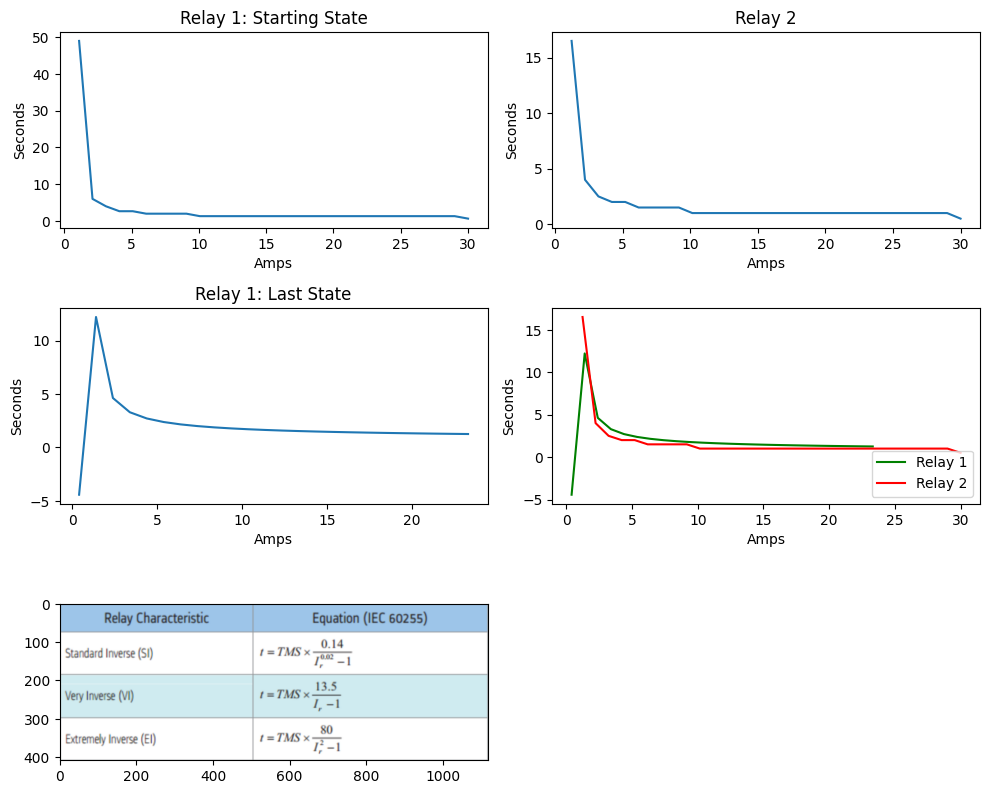

In [ ]:
img = mpimg.imread('equ.png')

plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.plot(x_rl1,y_rl1)
plt.title('Relay 1: Starting State')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,2)
plt.plot(x_rl2,y_rl2)
plt.title('Relay 2')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,3)
plt.plot(x_rl1_state,y_rl1_state)
plt.title('Relay 1: Last State')
plt.xlabel('Amps')
plt.ylabel('Seconds')

plt.subplot(3,2,4)
plt.plot(x_rl1_state,y_rl1_state,'g')
plt.plot(x_rl2,y_rl2,'r')
plt.xlabel('Amps')
plt.ylabel('Seconds')
plt.legend(["Relay 1", "Relay 2"], loc ="lower right")

plt.subplot(3,2,5)
plt.imshow(img)
plt.title('')

plt.tight_layout()  # Otomatik düzenleme için
plt.show()

# Keras RL

In [ ]:
a = 0

In [ ]:
state, r, done, info = env.step(1)

a += r
a

8

In [ ]:
for key,value in info.items():
  print("Key:{} -- Value:{}".format(info[key],value))

Key:True -- Value:True
Key:True -- Value:True
Key:True -- Value:True


In [ ]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam'''

'import numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Flatten\nfrom tensorflow.keras.optimizers.legacy import Adam'

In [ ]:
env.observation_space.sample()

array([49.217445], dtype=float32)

In [ ]:
env.action_space.sample()

3

In [ ]:
states = env.observation_space.shape
actions = env.action_space.n

In [ ]:
env.observation_space

Box(0.0, 50.0, (1,), float32)

In [ ]:
states

(1,)

In [ ]:
actions

5

In [ ]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,30)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
del model

In [ ]:
model = build_model(states, actions)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 30)                0         
                                                                 
 dense_21 (Dense)            (None, 24)                744       
                                                                 
 dense_22 (Dense)            (None, 24)                600       
                                                                 
 dense_23 (Dense)            (None, 5)                 125       
                                                                 
Total params: 1469 (5.74 KB)
Trainable params: 1469 (5.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''import tensorflow as tf

from keras import __version__

tf.keras.__version__ = __version__'''

'import tensorflow as tf\n\nfrom keras import __version__\n\ntf.keras.__version__ = __version__'

In [ ]:
'''from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory'''

'from rl.agents.dqn import DQNAgent\nfrom rl.policy import BoltzmannQPolicy\nfrom rl.memory import SequentialMemory'

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [ ]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
  155/10000 [..............................] - ETA: 4:21 - reward: 1.0000

<ipython-input-133-042634041d88>:3: RuntimeWarning: invalid value encountered in double_scalars
  value = TMS_Value*((0.14)/(x**0.02-1))


10000/10000 [==============================] - 130s 13ms/step - reward: 0.2558
47 episodes - episode_reward: 55.915 [-153.000, 255.000] - loss: 3.021 - mae: 23.609 - mean_q: 29.675 - dt: -0.479 - TMS: 0.706 - x_rl2: 1.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 129s 13ms/step - reward: 0.3018
48 episodes - episode_reward: 60.417 [-158.000, 222.000] - loss: 3.203 - mae: 25.649 - mean_q: 32.212 - dt: -6.145 - TMS: 0.713 - x_rl2: 1.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 128s 13ms/step - reward: 0.1524
45 episodes - episode_reward: 32.956 [-198.000, 225.000] - loss: 3.323 - mae: 26.708 - mean_q: 33.537 - dt: 0.104 - TMS: 0.631 - x_rl2: 1.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 128s 13ms/step - reward: 0.1398
46 episodes - episode_reward: 32.065 [-180.000, 248.000] - loss: 3.080 - mae: 25.899 - mean_q: 32.531 - dt: -0.785 - TMS: 0.682 - x_rl2: 1.000

Inte

In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...


KeyboardInterrupt: ignored

In [ ]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
dqn.test(env,visualize=False)

Testing for 1 episodes ...


KeyboardInterrupt: ignored

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained DQN agent and an environment

# Function to visualize Q-values for different states
def visualize_q_values(agent, states):
    q_values = []
    for state in states:
        q_values.append(agent.get_q_values(state))  # Assuming agent has a method to get Q-values for a state

    q_values = np.array(q_values)

    plt.figure(figsize=(10, 6))
    for action_idx in range(agent.action_space):
        plt.plot(q_values[:, action_idx], label=f'Action {action_idx}')
    plt.xlabel('States')
    plt.ylabel('Q-values')
    plt.title('Q-values for different actions in states')
    plt.legend()
    plt.show()

# Function to visualize action distribution
def visualize_action_distribution(agent, episodes):
    action_counts = np.zeros(agent.action_space)
    for episode in episodes:
        actions = agent.get_actions(episode)  # Assuming agent has a method to get actions taken in an episode
        unique, counts = np.unique(actions, return_counts=True)
        for idx, action in enumerate(unique):
            action_counts[action] += counts[idx]

    plt.figure(figsize=(8, 6))
    plt.bar(range(agent.action_space), action_counts)
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.title('Action Distribution')
    plt.show()

# Assuming you have states and episodes data available for visualization
# states = [...]  # List of states
# episodes = [...]  # List of episodes

# Visualizing Q-values
visualize_q_values(dqn, states)

# Visualizing action distribution
visualize_action_distribution(dqn, 10)
